### **可分离滤波**

* 有时我们需要根据实际需求调整滤波模板，例如滤波器中心位置像素值不参与计算，滤波器中参与计算像素值不是一个矩形区域等

* OpenCV4无法根据每种需求单独编写滤波函数，因此用cv.filter2D()函数来实现自定义图像滤波

* 无论是图像卷积还是滤波，在原图像上移动滤波器中每次一计算结果不影响后面的计算结果，因此是一个并行算法

* 同时图像滤波还具有可分离性，先对x方向滤波，再对y方向滤波，结果与将两个方向的滤波器联合后滤波的结果相同，即将两个方向的滤波器相乘得到一个矩阵滤波器，可以用cv.getGaussianKernel()函数分别得到x方向和y方向的滤波器

In [8]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [9]:
# 验证滤波算法的数据矩阵
data = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20], [21, 22, 23, 24, 25]], dtype='float32')
# 构建滤波器
a = np.array([[-1], [3], [-1]])
b = a.reshape((1, 3))
ab = a * b
# 验证高斯滤波的可分离性
gaussX = cv.getGaussianKernel(3, 1)
gauss_data = cv.GaussianBlur(data, (3, 3), 1, None, 1, cv.BORDER_CONSTANT)
gauss_data_XY = cv.sepFilter2D(data, -1, gaussX, gaussX, None, (-1, -1), 0, cv.BORDER_CONSTANT)
print('采用cv.GaussianBlur：\n{}'.format(gauss_data))
print('采用cv.sepFilter2D：\n{}'.format(gauss_data_XY))

采用cv.GaussianBlur：
[[ 1.7207065  2.822206   3.5481372  4.274069   3.430702 ]
 [ 4.629657   7.         8.         9.         6.9852457]
 [ 8.259314  12.        13.        14.        10.6149025]
 [11.888971  17.        18.        19.        14.244559 ]
 [10.270683  14.600147  15.326078  16.05201   11.9806795]]
采用cv.sepFilter2D：
[[ 1.7207065  2.822206   3.5481372  4.274069   3.430702 ]
 [ 4.629657   7.         8.         9.         6.9852457]
 [ 8.259314  12.        13.        14.        10.6149025]
 [11.888971  17.        18.        19.        14.244559 ]
 [10.270683  14.600147  15.326078  16.05201   11.9806795]]


In [10]:
# 验证线性滤波的可分离性
data_Y = cv.filter2D(data, -1, a, None, (-1, -1), 0, cv.BORDER_CONSTANT)
data_YX = cv.filter2D(data_Y, -1, b, None, (-1, -1), 0, cv.BORDER_CONSTANT)
data_XY = cv.filter2D(data, -1, ab, None, (-1, -1), 0, cv.BORDER_CONSTANT)
data_XY_sep = cv.sepFilter2D(data, -1, b, b, None, (-1, -1), 0, cv.BORDER_CONSTANT)
print('data_Y=\n{}'.format(data_Y))
print('data_YX=\n{}'.format(data_YX))
print('data_XY=\n{}'.format(data_XY))
print('data_XY_sep=\n{}'.format(data_XY_sep))

data_Y=
[[-3. -1.  1.  3.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]
 [47. 49. 51. 53. 55.]]
data_YX=
[[ -8.  -1.   1.   3.  12.]
 [ 11.   7.   8.   9.  21.]
 [ 21.  12.  13.  14.  31.]
 [ 31.  17.  18.  19.  41.]
 [ 92.  49.  51.  53. 112.]]
data_XY=
[[ -8.  -1.   1.   3.  12.]
 [ 11.   7.   8.   9.  21.]
 [ 21.  12.  13.  14.  31.]
 [ 31.  17.  18.  19.  41.]
 [ 92.  49.  51.  53. 112.]]
data_XY_sep=
[[ -8.  -1.   1.   3.  12.]
 [ 11.   7.   8.   9.  21.]
 [ 21.  12.  13.  14.  31.]
 [ 31.  17.  18.  19.  41.]
 [ 92.  49.  51.  53. 112.]]


In [11]:
# 对图像进行分离操作
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'equalLena.png')
if img is None:
    print('Failed to read equalLena.png')
    sys.exit

In [12]:
img_Y = cv.filter2D(img, -1, a, None, (-1, -1), 0, cv.BORDER_CONSTANT)
img_YX = cv.filter2D(img_Y, -1, b, None, (-1, -1), 0, cv.BORDER_CONSTANT)
img_XY = cv.filter2D(img, -1, ab, None, (-1, -1), 0, cv.BORDER_CONSTANT)

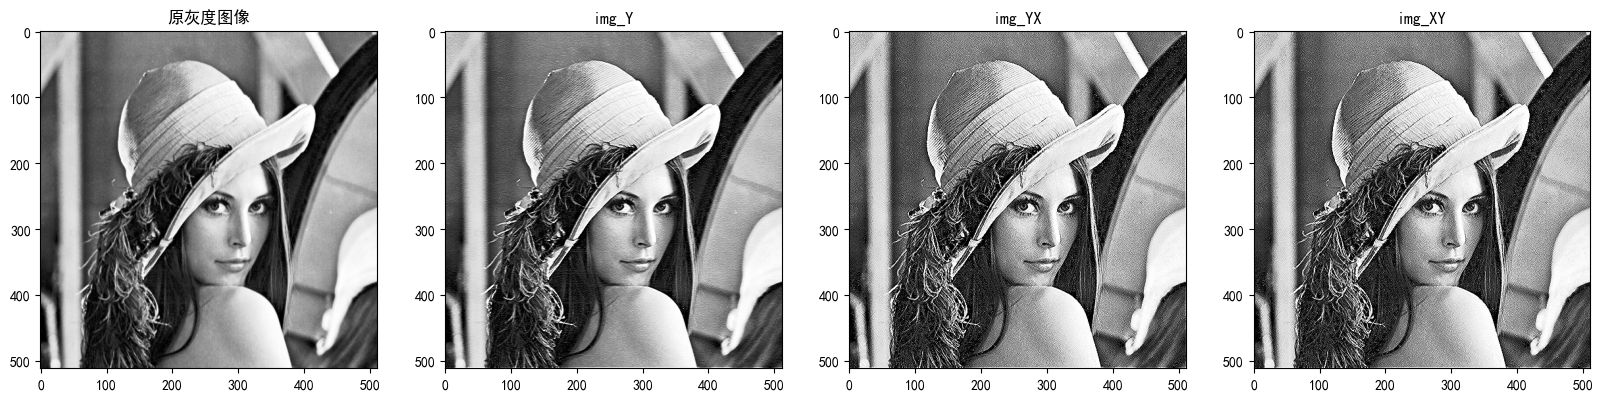

In [13]:
# 展示图像滤波结果
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.title('原灰度图像')
plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.title('img_Y')
plt.imshow(img_Y, cmap='gray')
plt.subplot(1, 4, 3)
plt.title('img_YX')
plt.imshow(img_YX, cmap='gray')
plt.subplot(1, 4, 4)
plt.title('img_XY')
plt.imshow(img_XY, cmap='gray')